## Introdution:
This data set consists of three types of entities: 

1. the specification of an auto in terms of various characteristics

2. its assigned insurance risk rating, 

3. its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Data Dictionary:
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Display Settings 

In [3]:
pd.options.display.max_columns = 50

## Loading dataset

In [4]:
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

- We can observe that columns do not have names as they are in the dataset documentation. We need to rename them to 

## Gathering Summary Statistics and Information

In [6]:
cols = ['symboling', 'normalized-losses', 'make', 
        'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [8]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
for col in cars.columns:
    print(cars[col].value_counts(dropna=False))

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
?      41
161    11
91      8
150     7
134     6
104     6
128     6
102     5
94      5
65      5
168     5
95      5
103     5
85      5
74      5
122     4
93      4
118     4
106     4
148     4
115     3
101     3
154     3
137     3
83      3
125     3
87      2
164     2
192     2
145     2
110     2
197     2
153     2
158     2
188     2
194     2
89      2
129     2
113     2
119     2
108     2
81      2
77      1
186     1
231     1
121     1
256     1
98      1
107     1
90      1
142     1
78      1
Name: normalized-losses, dtype: int64
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         

- we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns.

## Data Cleaning 

#### Replacing '?' to np.nan

In [10]:
cars = cars.replace('?', np.nan)

#### Converting columns of numeric nature back to int or floats

Following columns are of numeric and continuous nature as mentioned in the data dictionary as well

In [11]:
num_cols = ['normalized-losses', 'wheel-base', 'length', 
            'width', 'height', 'curb-weight', 'engine-size', 
            'bore', 'stroke', 'compression-rate', 
            'horsepower', 'peak-rpm', 'city-mpg', 
            'highway-mpg', 'price']
num_cars = cars[num_cols]

In [12]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
num_cars.shape

(205, 15)

In [14]:
num_cars = num_cars.astype(float)
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [15]:
num_cars[num_cars['normalized-losses'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


There are many options to tackle the NaNs in normalized-losses column from replacing all NaNs with mean or mode to deleting the columns entirely.

Building up gradually, **lets delete the rows which do not have values for prices too.**

By looking in info, we can see that all 4 null values in prices are in this contidional dataframe too.

In [16]:
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Lets replace the rest of the values with mean of the column

In [17]:
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum().sum()

0

### Except for the target variable, the price, lets normalize all the columns

In [18]:
i_was_price_col = cars['price']

In [19]:
norm_num_cars = (num_cars - num_cars.min())/(num_cars.max() - num_cars.min())

In [20]:
norm_num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


## Training and Testing Univariate models

#### The function

In [21]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    # One for train other for test
    half = int(len(rand_df) / 2)
    
    # Assign to train
    train_df = rand_df.iloc[0:half]
    # Assign to test
    test_df = rand_df.iloc[half:]
    
    
    # Fit a KNN model to train_df (features and target)
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    
    # Predict 
    prediction = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    return rmse

##### Lets try training and testing univariate models with default k value

In [22]:
dict_rmse_uni = {}

In [23]:
train_cols = num_cars.columns.drop('price')


In [24]:
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', num_cars)
    dict_rmse_uni[col] = rmse_val

In [29]:
ser_rmse_uni = pd.Series(dict_rmse_uni)
ser_rmse_uni.sort_values()

engine-size          3271.449938
horsepower           4048.437725
curb-weight          4445.141920
highway-mpg          4643.046278
city-mpg             4760.449842
width                4772.459149
length               5428.810101
wheel-base           5460.851458
compression-rate     6610.812153
bore                 6795.388312
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

- From the results, we can see that engine size performed the best at default value of k

### Lets modify the function to accept a parameter of k value

In [44]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    # One for train other for test
    half = int(len(rand_df) / 2)
    
    # Assign to train
    train_df = rand_df.iloc[0:half]
    # Assign to test
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[[train_col]], train_df[target_col])


        # Predict 
        prediction = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse

In [45]:
dict_k_rmse_uni = {}
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', num_cars)
    dict_k_rmse_uni[col] = rmse_val
dict_k_rmse_uni

{'bore': {1: 8602.58848450066,
  2: 7036.080558713983,
  3: 6984.239489480916,
  4: 6796.379776302794,
  5: 6795.388311535586,
  6: 6967.450186252485,
  7: 6896.559499627726,
  8: 6804.8502563574475,
  9: 6882.822815090022,
  10: 6713.161042436206},
 'city-mpg': {1: 5901.143574354764,
  2: 4984.245517996015,
  3: 4608.180446380397,
  4: 4792.102838858226,
  5: 4760.44984187731,
  6: 4952.840473150256,
  7: 5218.847825621605,
  8: 5319.139271365311,
  9: 5446.82446248222,
  10: 5397.905103063889},
 'compression-rate': {1: 8087.205346523092,
  2: 7076.9743288350355,
  3: 7375.063685578359,
  4: 6951.352201155179,
  5: 6610.812153159129,
  6: 6631.565127221375,
  7: 6732.801282941515,
  8: 6964.0659273672745,
  9: 7024.485525463435,
  10: 7037.301604012832},
 'curb-weight': {1: 5264.290230758878,
  2: 5550.541775135536,
  3: 5022.318011757233,
  4: 4742.881546210715,
  5: 4445.141920375235,
  6: 4418.368809715738,
  7: 4330.608104418053,
  8: 4491.9937326828085,
  9: 4632.92525121302,
  1

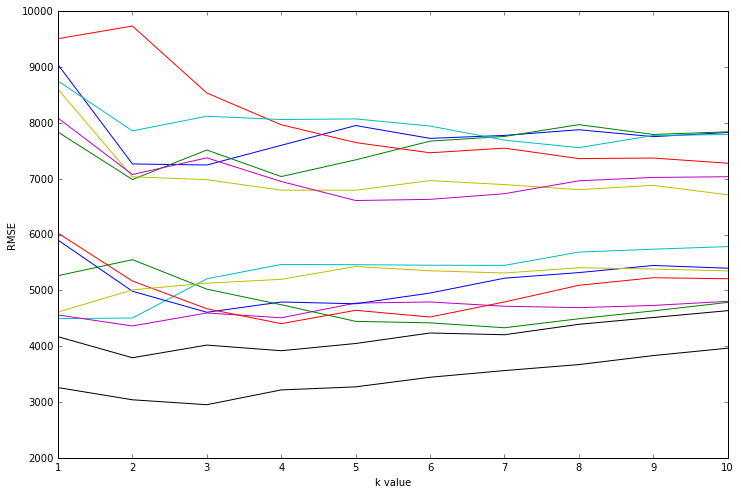

In [46]:
plt.figure(figsize=(12,8))
for k,v in dict_k_rmse_uni.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Modifying our function to go for multiple columns (Multivariate)

In [49]:
# Compute average RMSE across different `k` values for each feature.
features_avg_rmse = {}
for k,v in dict_k_rmse_uni.items():
    avg_rmse = np.mean(list(v.values()))
    features_avg_rmse[k] = avg_rmse
ser_avg_rmse = pd.Series(features_avg_rmse)
sorted_ser_avg_rmse = ser_avg_rmse.sort_values()
print(sorted_ser_avg_rmse)

sorted_features = sorted_ser_avg_rmse.index


engine-size          3421.104643
horsepower           4193.604649
width                4653.333107
curb-weight          4768.382985
highway-mpg          4975.526951
city-mpg             5138.167936
length               5218.058090
wheel-base           5324.181734
bore                 7047.952042
compression-rate     7049.162718
normalized-losses    7576.072930
stroke               7807.749760
height               7963.361328
peak-rpm             8043.363814
dtype: float64


In [61]:
def knn_train_test(train_col, target_col, df, k):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    # One for train other for test
    half = int(len(rand_df) / 2)
    
    # Assign to train
    train_df = rand_df.iloc[0:half]
    # Assign to test
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [k]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[train_col], train_df[target_col])


        # Predict 
        prediction = knn.predict(test_df[train_col])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse
k_rmse_results = {}
for num_of_best_features in range(2,7):
    k_rmse_results['{} number of best features'.format(num_of_best_features)] = knn_train_test(sorted_features[:num_of_best_features], 'price', num_cars, 5)

In [62]:
k_rmse_results

{'2 number of best features': {5: 2925.00464591321},
 '3 number of best features': {5: 2901.007254846714},
 '4 number of best features': {5: 3864.067381953533},
 '5 number of best features': {5: 3870.6838798617723},
 '6 number of best features': {5: 3870.6838798617723}}

### Towards Optimization

For the top 3 models in the last step, lets vary the hyperparameter value from 1 to 25

In [64]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    # One for train other for test
    half = int(len(rand_df) / 2)
    
    # Assign to train
    train_df = rand_df.iloc[0:half]
    # Assign to test
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [i for i in range(1, 25)]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[train_col], train_df[target_col])


        # Predict 
        prediction = knn.predict(test_df[train_col])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse
k_rmse_results = {}
for num_of_best_features in range(2,7):
    k_rmse_results['{} number of best features'.format(num_of_best_features)] = knn_train_test(sorted_features[:num_of_best_features], 'price', num_cars)

In [65]:
k_rmse_results

{'2 number of best features': {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.634184404111,
  16: 4477.339380724929,
  17: 4542.7101905616355,
  18: 4675.594058904271,
  19: 4696.93629950144,
  20: 4684.844437694387,
  21: 4744.078137218994,
  22: 4779.969895724662,
  23: 4826.869687492047,
  24: 4881.349005863175},
 '3 number of best features': {1: 2861.158731550683,
  2: 2644.428153665928,
  3: 2681.7457878865184,
  4: 2722.280458854013,
  5: 2901.007254846714,
  6: 3079.0995987640463,
  7: 3210.5192759138426,
  8: 3485.8385181559474,
  9: 3782.798641745253,
  10: 4029.356670465123,
  11: 4133.471835231293,
  12: 4225.481801502254,
  13: 4232.577904328598,
  14: 4309.041242789048,
 

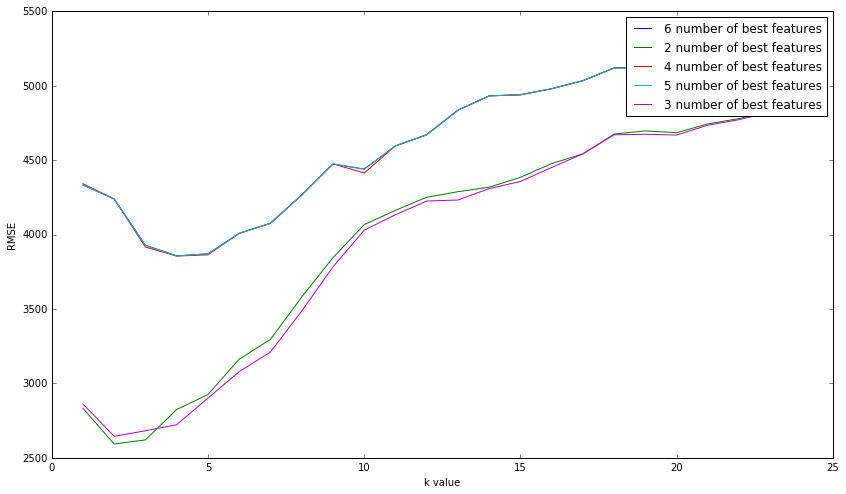

In [68]:
plt.figure(figsize=(14,8))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()